#### VGG_16_19_FEIJAOORG_MTX_CONF

Found 74 images belonging to 10 classes.
Found 18 images belonging to 10 classes.
Epoch 1/50
2/2 [==============================] - 29s 21s/step - loss: 9.0958 - accuracy: 0.0952 - val_loss: 6.4148 - val_accuracy: 0.1111
Epoch 2/50
2/2 [==============================] - 32s 19s/step - loss: 8.4533 - accuracy: 0.1094 - val_loss: 4.6658 - val_accuracy: 0.2222
Epoch 3/50
2/2 [==============================] - 34s 20s/step - loss: 7.4463 - accuracy: 0.1562 - val_loss: 4.0441 - val_accuracy: 0.1111
Epoch 4/50
2/2 [==============================] - 25s 19s/step - loss: 5.4986 - accuracy: 0.1667 - val_loss: 3.1122 - val_accuracy: 0.3333
Epoch 5/50
2/2 [==============================] - 33s 19s/step - loss: 4.5817 - accuracy: 0.1719 - val_loss: 2.7250 - val_accuracy: 0.3333
Epoch 6/50
2/2 [==============================] - 25s 12s/step - loss: 3.0738 - accuracy: 0.3571 - val_loss: 2.3194 - val_accuracy: 0.2778
Epoch 7/50
2/2 [==============================] - 25s 19s/step - loss: 2.6152 - accu

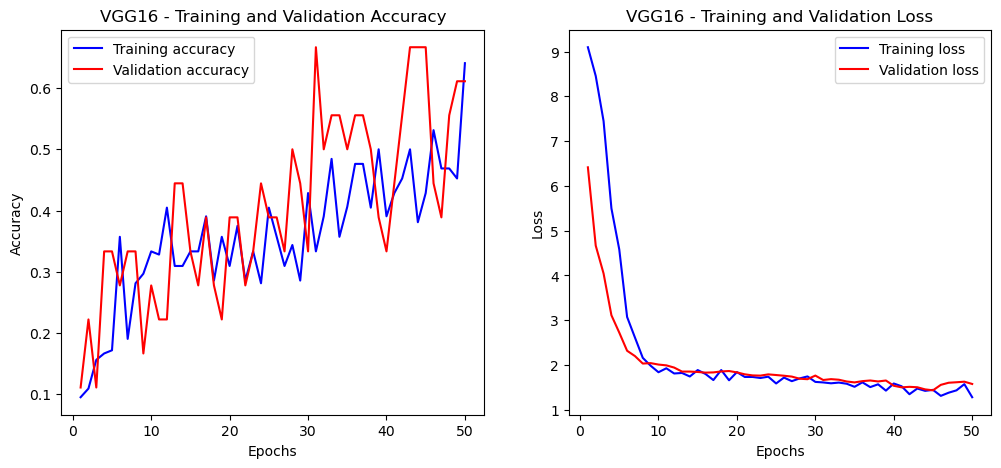

1/1 [==============================] - 9s 9s/step


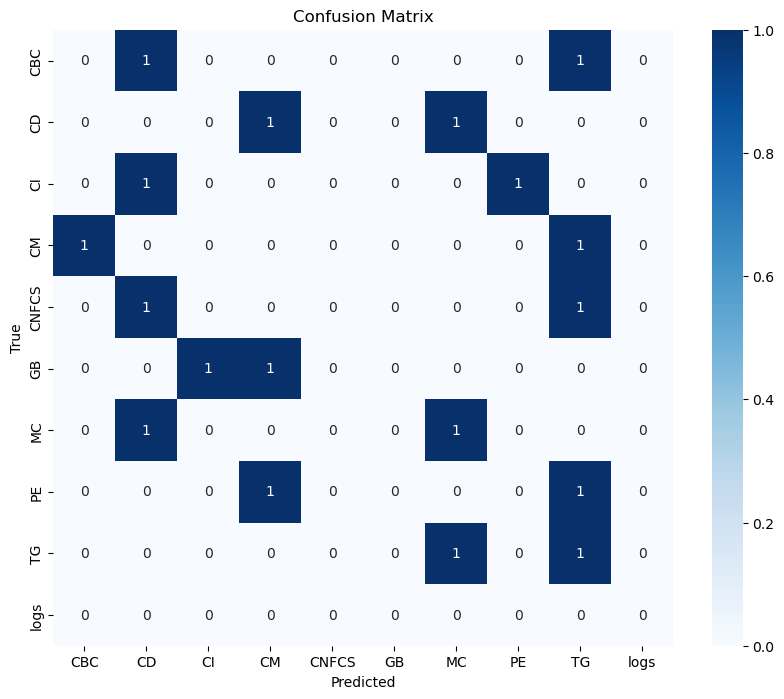

Epoch 1/50
2/2 [==============================] - 42s 24s/step - loss: 5.9687 - accuracy: 0.1562 - val_loss: 8.9971 - val_accuracy: 0.1111
Epoch 2/50
2/2 [==============================] - 29s 14s/step - loss: 11.5013 - accuracy: 0.1190 - val_loss: 6.2811 - val_accuracy: 0.1111
Epoch 3/50
2/2 [==============================] - 29s 23s/step - loss: 7.5390 - accuracy: 0.1190 - val_loss: 3.1195 - val_accuracy: 0.1667
Epoch 4/50
2/2 [==============================] - 40s 24s/step - loss: 4.8822 - accuracy: 0.2031 - val_loss: 3.9276 - val_accuracy: 0.1111
Epoch 5/50
2/2 [==============================] - 39s 23s/step - loss: 4.5137 - accuracy: 0.1094 - val_loss: 2.4218 - val_accuracy: 0.2222
Epoch 6/50
2/2 [==============================] - 30s 14s/step - loss: 3.2369 - accuracy: 0.1429 - val_loss: 2.1791 - val_accuracy: 0.1111
Epoch 7/50
2/2 [==============================] - 33s 14s/step - loss: 2.1401 - accuracy: 0.3571 - val_loss: 2.1222 - val_accuracy: 0.2222
Epoch 8/50
2/2 [==========

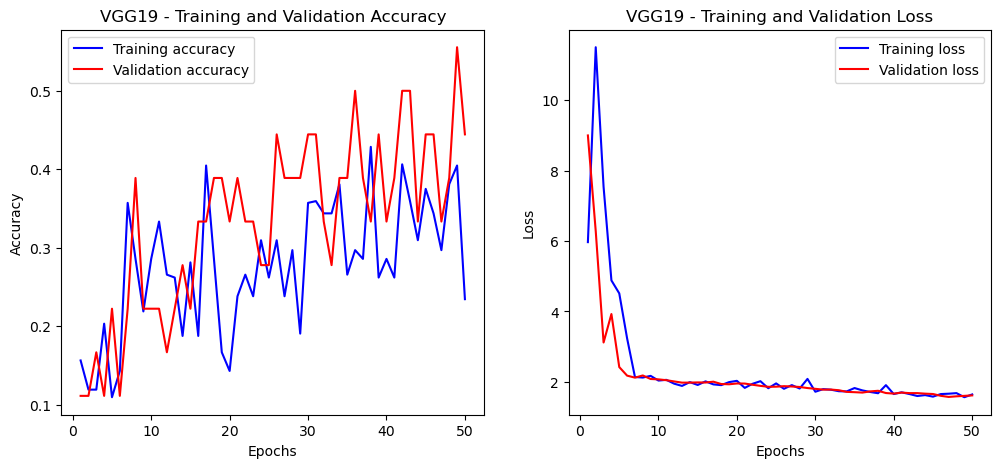

1/1 [==============================] - 23s 23s/step


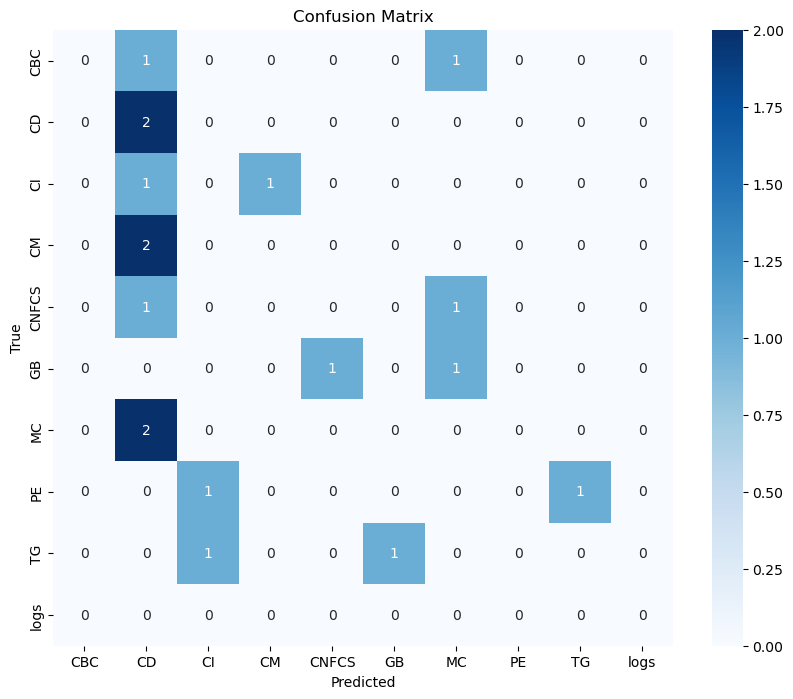

In [9]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, VGG19
from tensorflow.keras import models, layers, optimizers
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Corrigindo o caminho do diretório de dados
data_dir = r"C:\Users\mttvi\OneDrive\Área de Trabalho\DB2\Igm_filtradas"

img_size = (256, 256)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # <-- Adicionei o parêntese que estava faltando aqui
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

def plot_training(history, model_name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title(f'{model_name} - Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Função para plotar matriz de confusão
def plot_confusion_matrix(model, generator):
    y_true = generator.classes
    num_batches = int(np.ceil(generator.samples / batch_size))
    y_pred = []

    for i in range(num_batches):
        batch_x, batch_y = generator.next()
        pred_batch = model.predict(batch_x)
        y_pred.extend(np.argmax(pred_batch, axis=-1))

    y_pred = np.array(y_pred)
    
    cm = confusion_matrix(y_true, y_pred, labels=list(train_generator.class_indices.values()))

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg16_model.layers:
    layer.trainable = False

model_vgg16 = models.Sequential()
model_vgg16.add(vgg16_model)
model_vgg16.add(layers.Flatten())
model_vgg16.add(layers.Dense(256, activation='relu'))
model_vgg16.add(layers.Dropout(0.5))
model_vgg16.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

model_vgg16.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_vgg16 = model_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=math.ceil(val_generator.samples / batch_size)
)

val_loss_vgg16, val_acc_vgg16 = model_vgg16.evaluate(val_generator, steps=math.ceil(val_generator.samples / batch_size))
print(f'VGG16 Validation Accuracy: {val_acc_vgg16 * 100:.2f}%')

plot_training(history_vgg16, 'VGG16')

plot_confusion_matrix(model_vgg16, val_generator)

vgg19_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

for layer in vgg19_model.layers:
    layer.trainable = False

model_vgg19 = models.Sequential()
model_vgg19.add(vgg19_model)
model_vgg19.add(layers.Flatten())
model_vgg19.add(layers.Dense(256, activation='relu'))
model_vgg19.add(layers.Dropout(0.5))
model_vgg19.add(layers.Dense(len(train_generator.class_indices), activation='softmax'))

model_vgg19.compile(
    optimizer=optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_vgg19 = model_vgg19.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=math.ceil(val_generator.samples / batch_size)
)

val_loss_vgg19, val_acc_vgg19 = model_vgg19.evaluate(val_generator, steps=math.ceil(val_generator.samples / batch_size))
print(f'VGG19 Validation Accuracy: {val_acc_vgg19 * 100:.2f}%')

plot_training(history_vgg19, 'VGG19')

plot_confusion_matrix(model_vgg19, val_generator)
